# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('previsao_de_renda.csv')
df.tail()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39
14999,14999,2016-03-01,12895,F,True,True,0,Assalariado,Secundário,Casado,Casa,50,3.049315,2.0,False,993.86


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [47]:
df['data_ref'] = pd.to_datetime(df['data_ref'])
df['mes'] = df['data_ref'].apply(lambda x: x.strftime('%b'))
df['ano'] = df['data_ref'].apply(lambda x: x.strftime('%Y'))

In [48]:
df.dtypes

Unnamed: 0                        int64
data_ref                 datetime64[ns]
index                             int64
sexo                             object
posse_de_veiculo                   bool
posse_de_imovel                    bool
qtd_filhos                        int64
tipo_renda                       object
educacao                         object
estado_civil                     object
tipo_residencia                  object
idade                             int64
tempo_emprego                   float64
qt_pessoas_residencia           float64
mau                                bool
renda                           float64
mes                              object
ano                              object
dtype: object

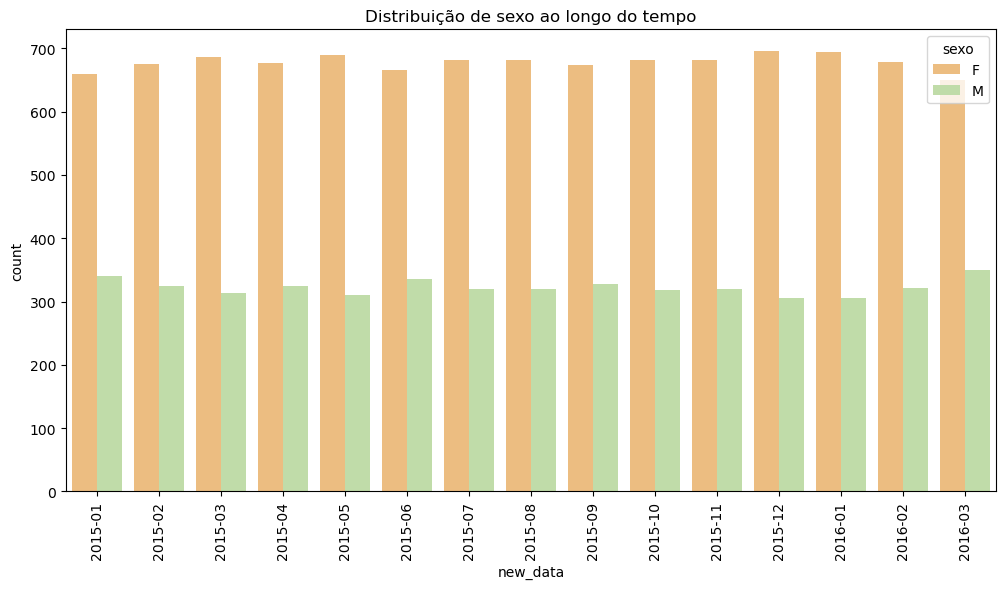

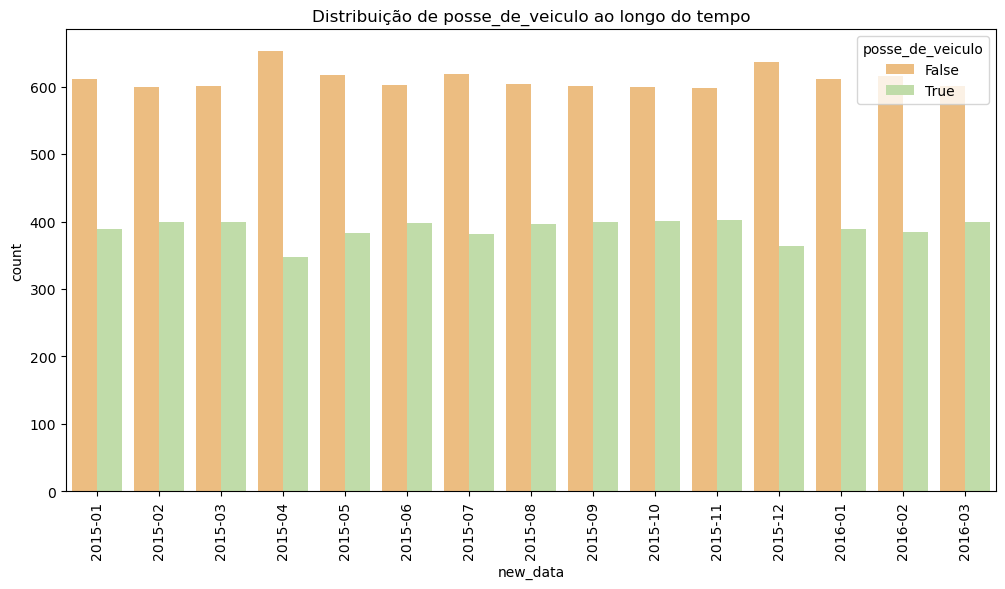

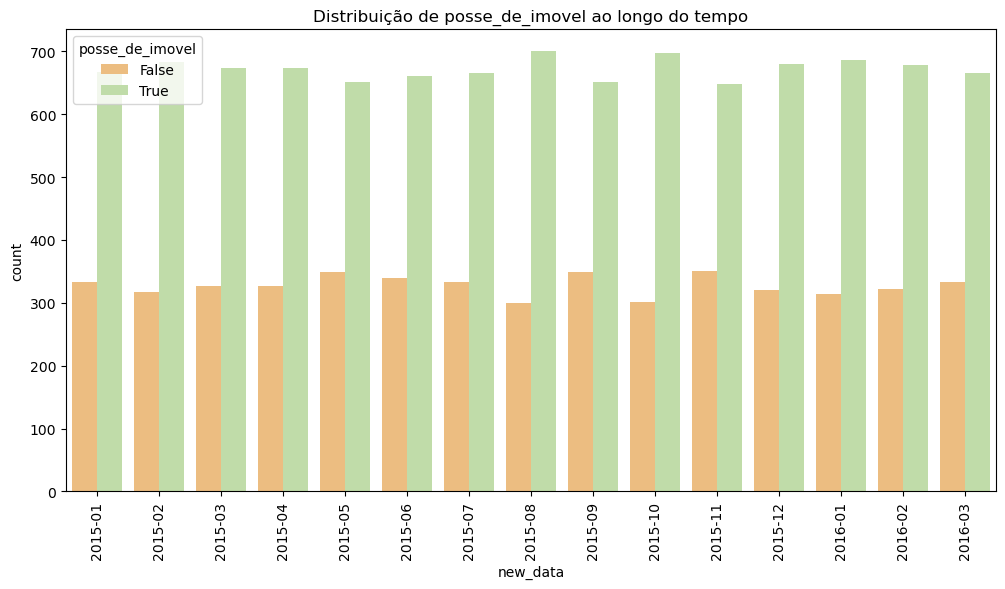

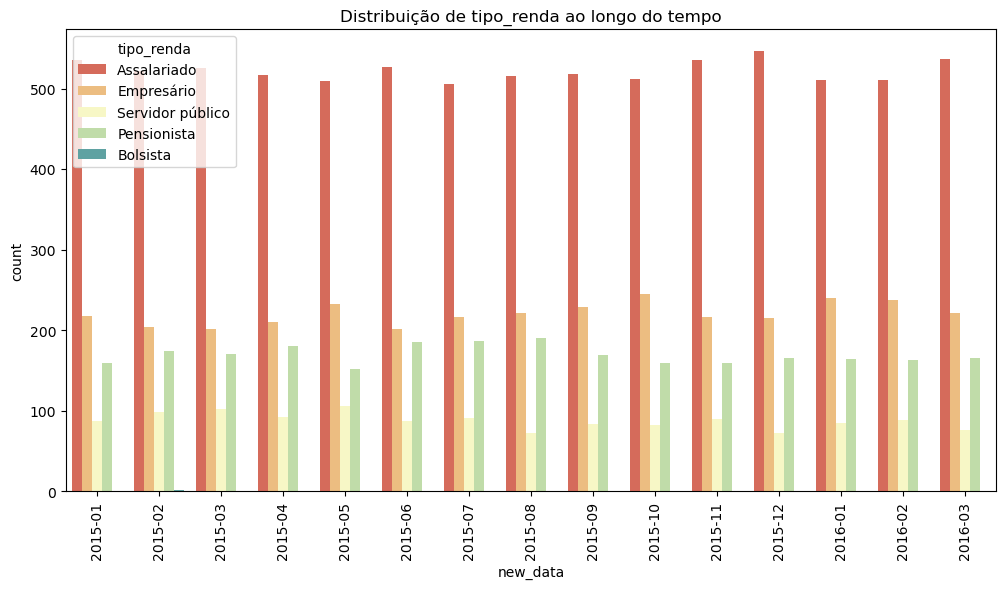

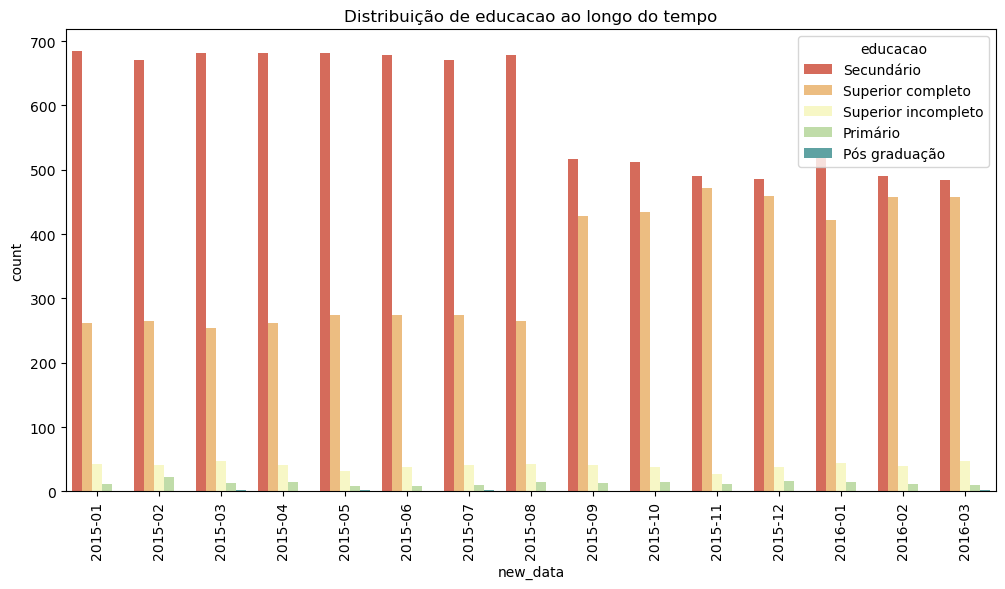

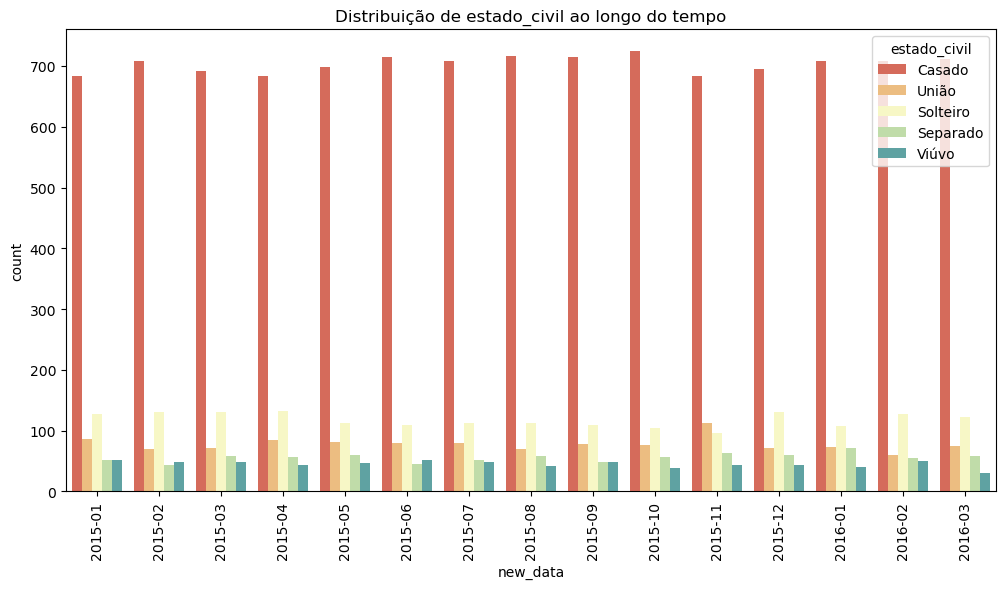

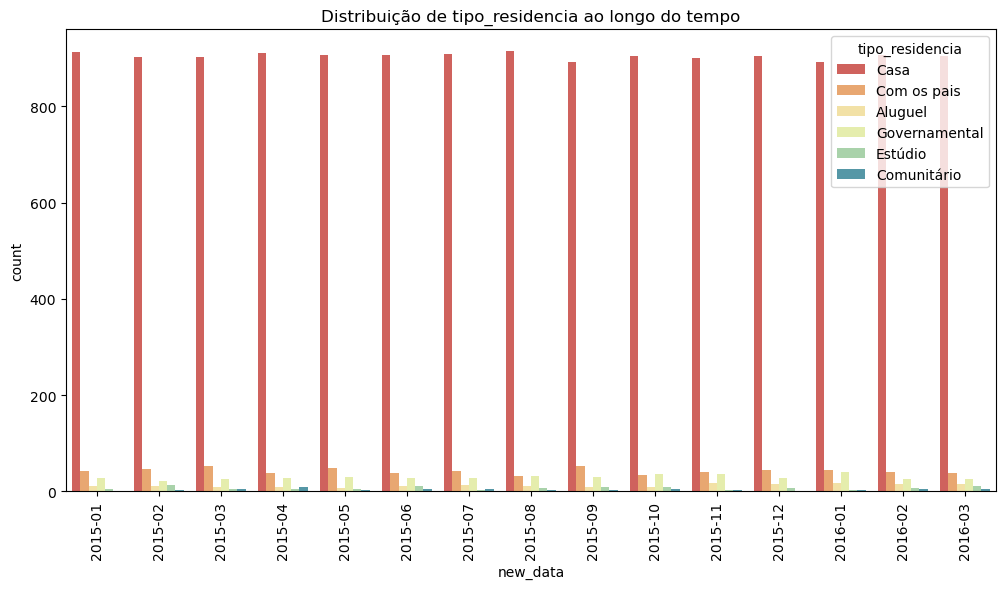

In [49]:
#Definindo as variáveis qualitativas.
df['new_data'] = df['data_ref'].apply(lambda x: x.strftime('%Y-%m'))
var_qualitative = df.drop(['mau','mes','ano','new_data'],axis=1).select_dtypes(['object','bool']).columns.tolist()
for qualitative in var_qualitative:
    plt.figure(figsize=(12,6))
    sns.countplot(data=df,x='new_data',hue=qualitative,palette='Spectral')
    plt.title(f'Distribuição de {qualitative} ao longo do tempo')
    plt.xticks(rotation=90)
    plt.show()

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

Agrupando para pegar os 'counts'

In [50]:
df_grouped = df[['new_data','tipo_residencia','sexo']].groupby(['new_data','tipo_residencia']).count().reset_index().rename(columns={'sexo':'Count'})
df_grouped.head(10)

,new_data,tipo_residencia,Count
0,2015-01,Aluguel,11
1,2015-01,Casa,913
2,2015-01,Com os pais,42
3,2015-01,Comunitário,1
4,2015-01,Estúdio,6
5,2015-01,Governamental,27
6,2015-02,Aluguel,12
7,2015-02,Casa,903
8,2015-02,Com os pais,47
9,2015-02,Comunitário,4


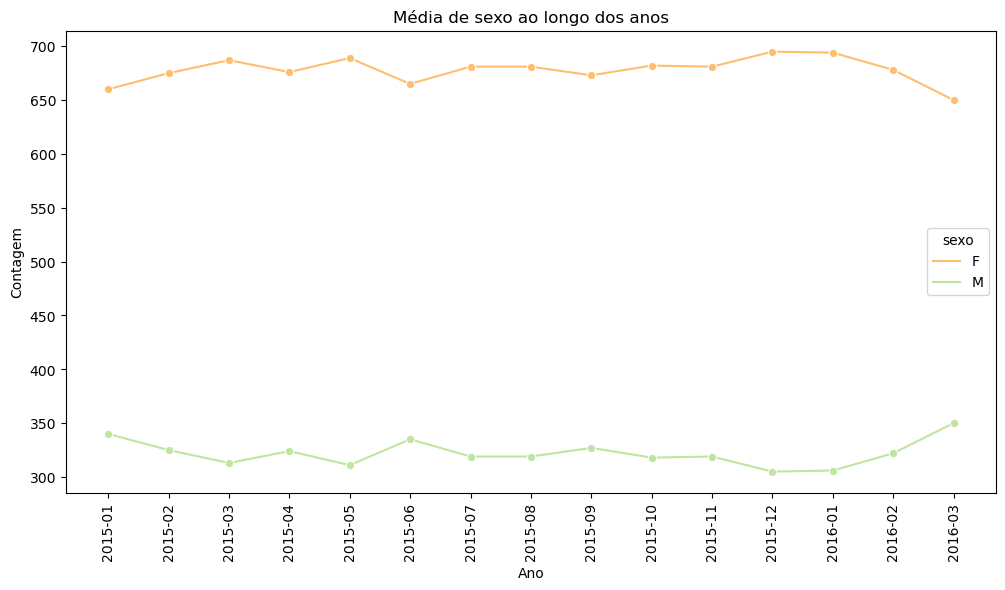

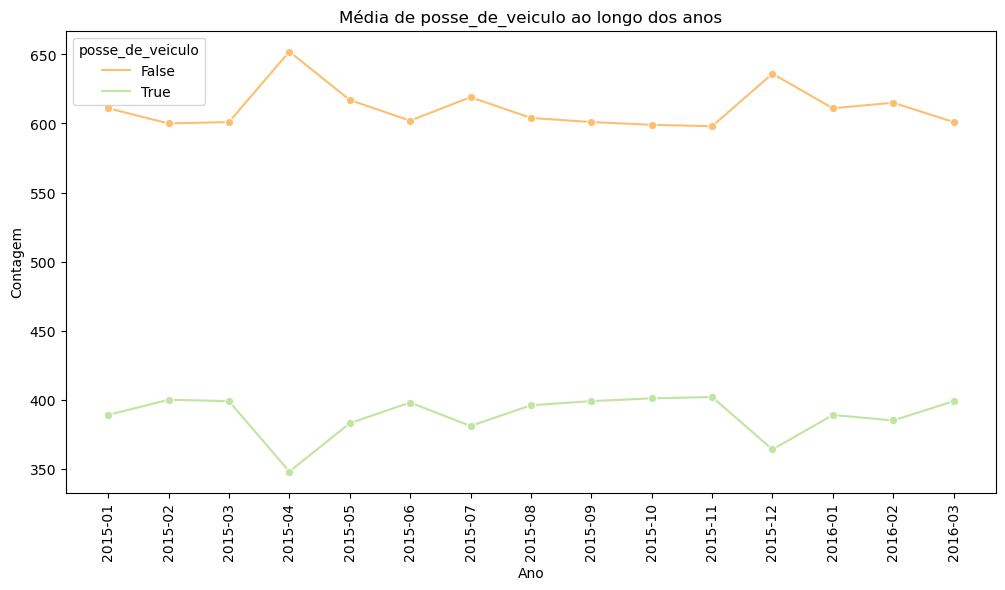

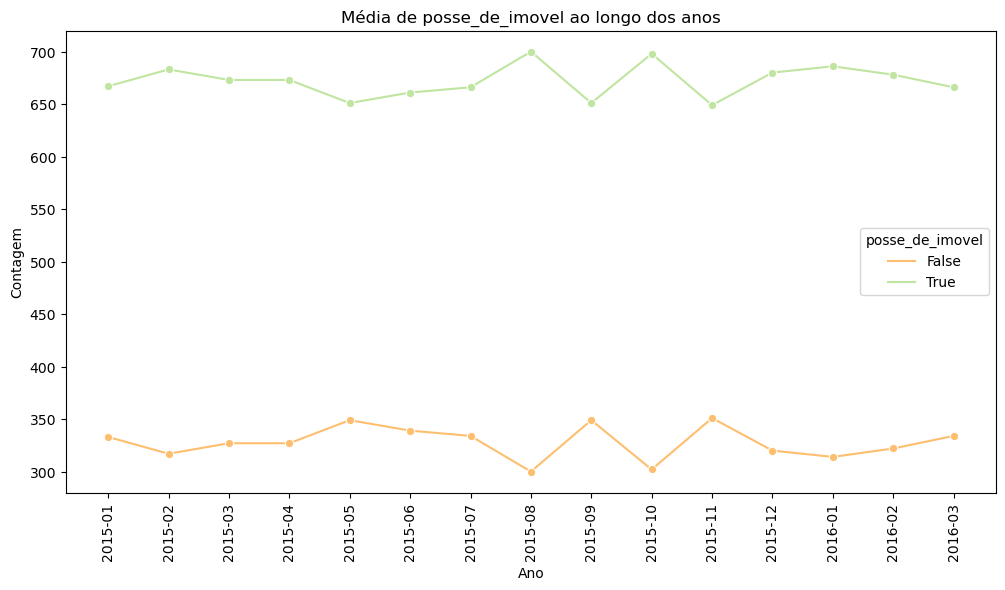

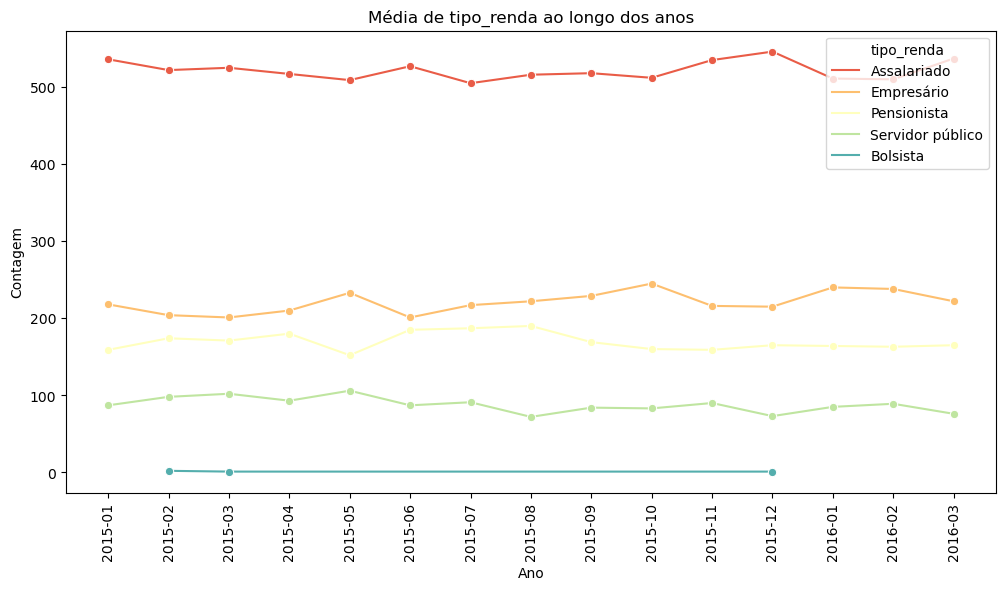

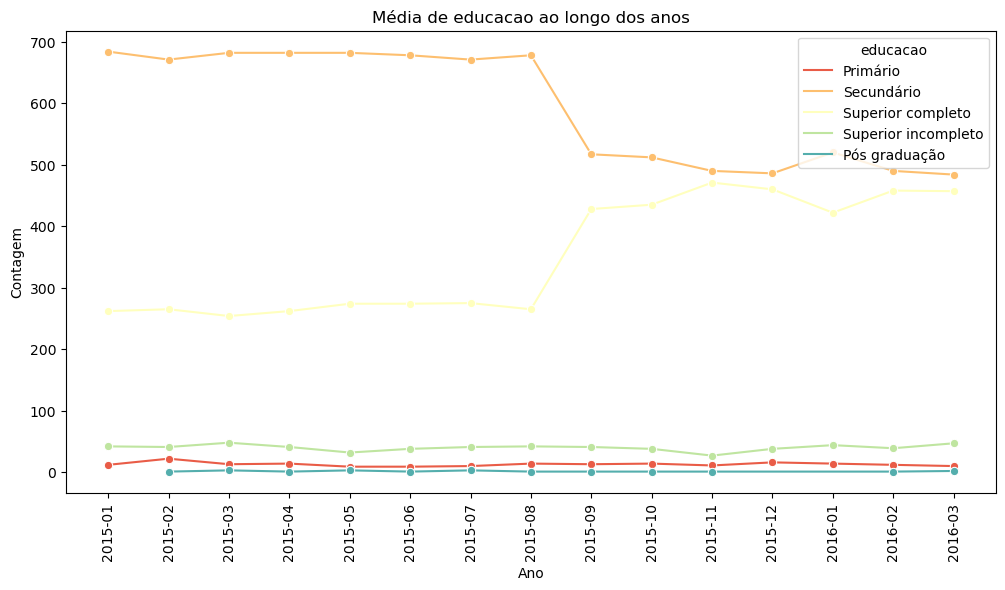

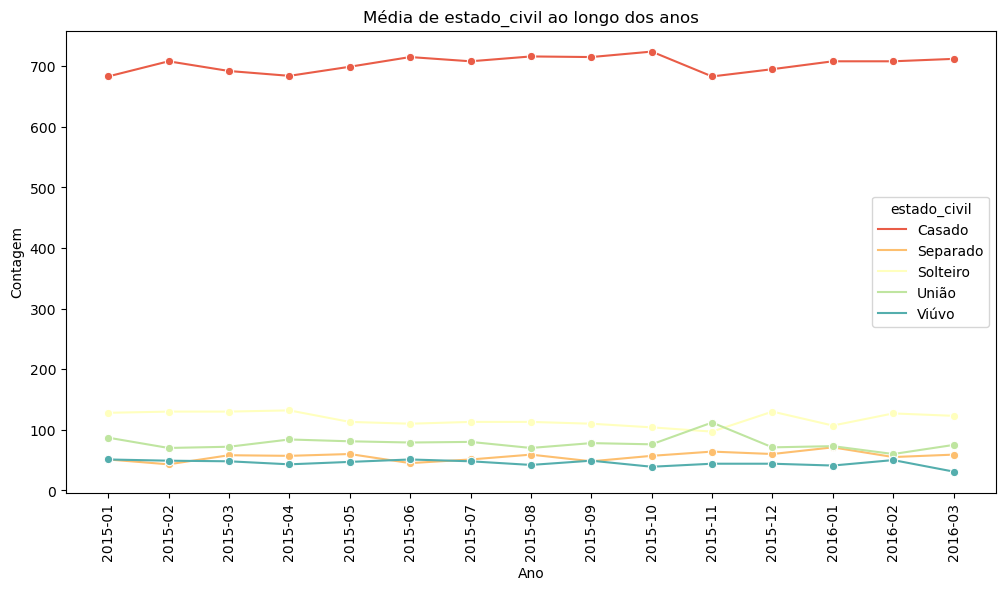

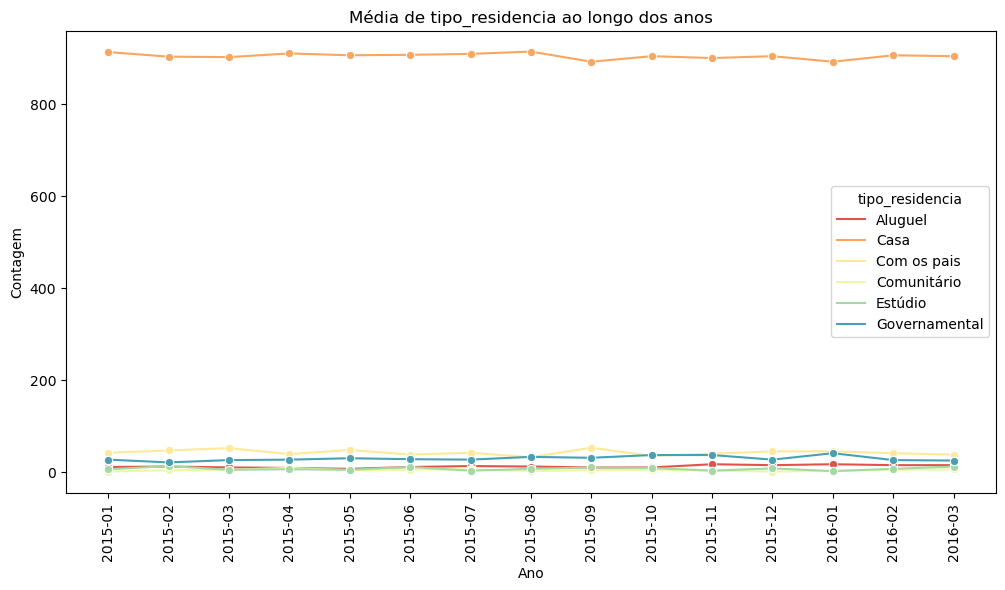

In [51]:
var_qualitative = df.drop(['mau','mes','ano','new_data'],axis=1).select_dtypes(['object','bool']).columns.tolist()

for var in var_qualitative:
    plt.figure(figsize=(12,6))
    df_grouped = df[['new_data',var,'mau']].groupby(['new_data',var]).count().reset_index().rename(columns={'mau':'count'}).sort_values('new_data')
    sns.lineplot(data=df_grouped,x='new_data',y='count',hue=var,marker='o',palette='Spectral')
    plt.title(f'Média de {var} ao longo dos anos')
    plt.xticks(rotation=90)
    plt.xlabel('Ano')
    plt.ylabel('Contagem')
    plt.show()

## Resposta para a 1:
**Acredito que não teve variação significativa não, os únicos detalhes que observei foram:**
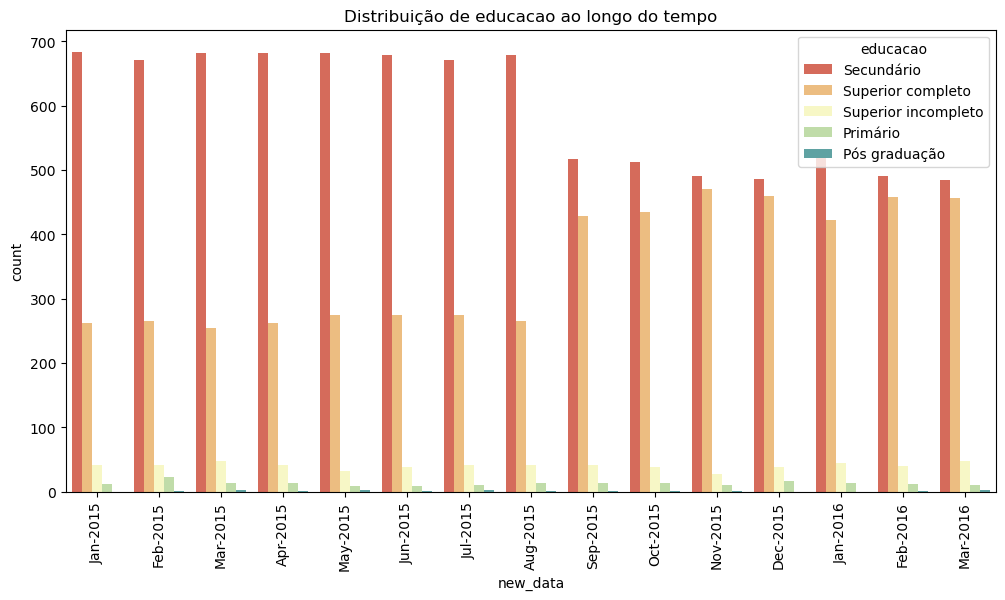
**No qual a partir de Setembro de 2015 o nível de educação "Superior Completo" , começa a ter a frequência muito próxima do nível de educação "Secundário", que sempre se manteve muito mais frequente. Acredito que ao decorrer de mais tempo, esses dados possam nos apresentar mais algumas características.**


## Resposta para a 2:

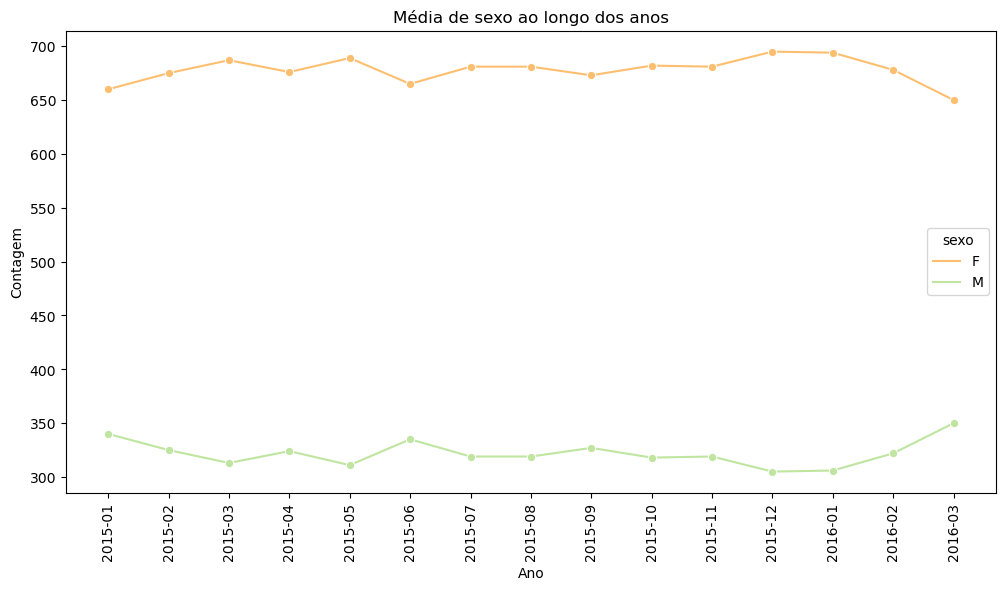

**Acima o detalhe a se pontuar e a prestar atenção é que a partir de 2016, tivemos um pequeno indício de uma 'tendência', pode-se ver a curvatura que aconteceu. Porém ainda não apresentou a devida inconsitência e variação completamente, apenas um detalhe a se pontuar.**

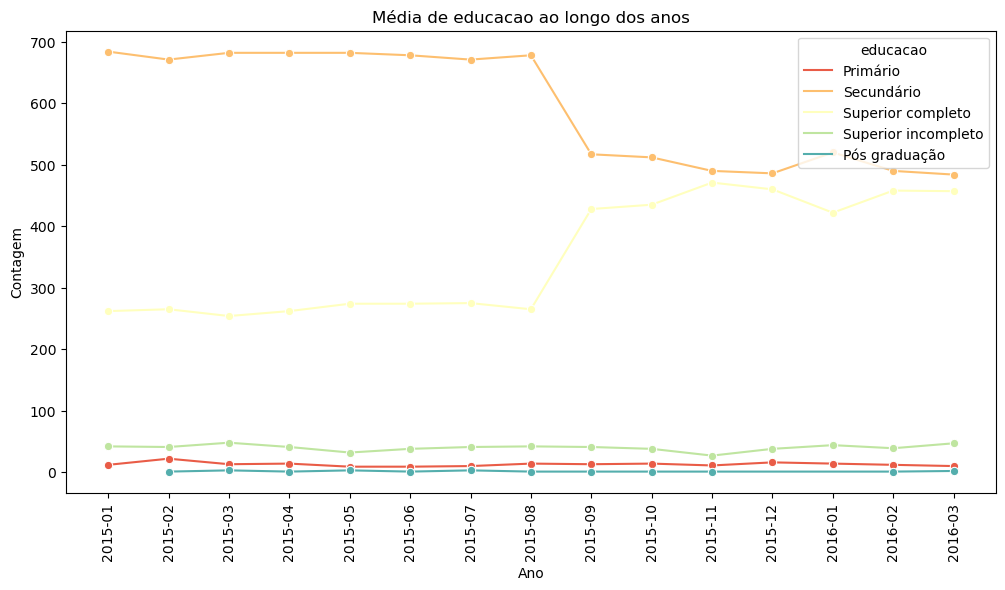
**Como pontuado no exercício 1, os níveis de 'Secundário' e  'Su8perior Completo' apresentam uma significativa variação ao longo do tempo, o que acontece a partir de Agosto de 2015, as linhas começam a se comportar de maneira extremamente diferente do comportamento antes de Agosto de 2015, é de se prestar atenção, acredito que possa haver complicações se for aplicada a um modelo**

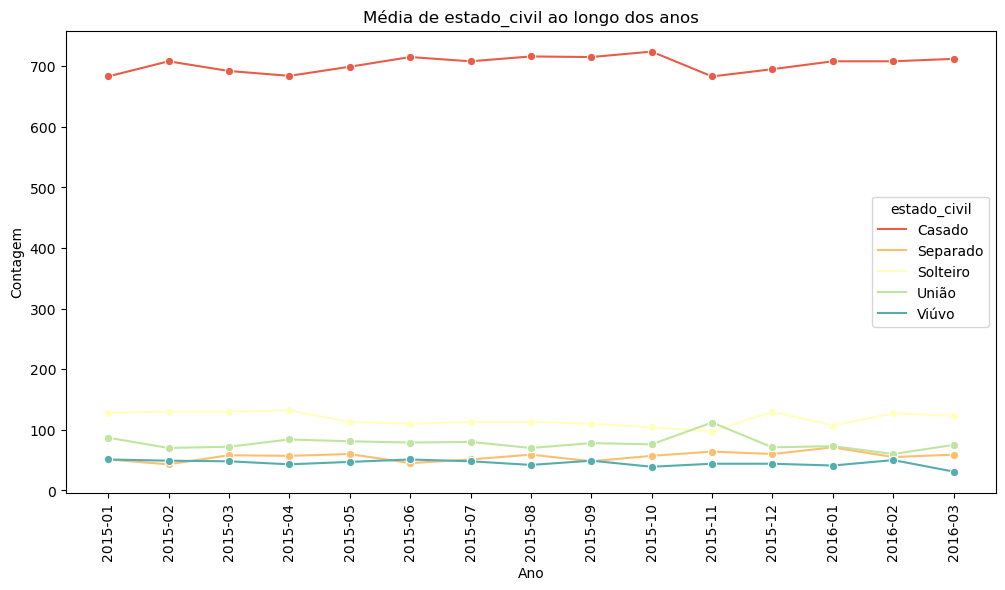
**Seguem sempre com a 'frequencia' média um pouco constante, com pequenas variações, detalhe que quero enfatizar é quem em Novembro de 2015 o estado civil 'União' teve um salto e foi um mês que superou o estado 'solteiro'. Porém acredito que não tenha tanta significância. Outro fator que me incomoda é ver diversas vezes a linha de viuvo e separado se encontrarem**


```Eu gostaria muito de saber o que alguem experiente observa nesses gráficos, o que eles fornecem de informação que eu não consegui reparar, peço por favor, que se deixei alguma informação passar, que seja especificado, agradeço.```